<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Standard-settings" data-toc-modified-id="Standard-settings-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Standard settings</a></span><ul class="toc-item"><li><span><a href="#Movielens---HR" data-toc-modified-id="Movielens---HR-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Movielens - HR</a></span></li><li><span><a href="#Movielens---MRR" data-toc-modified-id="Movielens---MRR-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Movielens - MRR</a></span></li><li><span><a href="#BookCrossing---HR" data-toc-modified-id="BookCrossing---HR-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>BookCrossing - HR</a></span></li><li><span><a href="#BookCrossing---MRR" data-toc-modified-id="BookCrossing---MRR-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>BookCrossing - MRR</a></span></li></ul></li><li><span><a href="#Cold-start-settings" data-toc-modified-id="Cold-start-settings-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Cold-start settings</a></span><ul class="toc-item"><li><span><a href="#Movielens---HR" data-toc-modified-id="Movielens---HR-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Movielens - HR</a></span></li><li><span><a href="#Movielens---MRR" data-toc-modified-id="Movielens---MRR-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Movielens - MRR</a></span></li><li><span><a href="#BookCrossing---HR" data-toc-modified-id="BookCrossing---HR-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>BookCrossing - HR</a></span></li><li><span><a href="#BookCrossing---MRR" data-toc-modified-id="BookCrossing---MRR-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>BookCrossing - MRR</a></span></li></ul></li><li><span><a href="#Combined" data-toc-modified-id="Combined-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Combined</a></span></li></ul></div>

In [1]:
# imports
from __future__ import division
from collections import defaultdict
from collections import OrderedDict

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
params = {'text.usetex': False,
         'legend.fontsize': 'x-large',
          #'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         }
plt.rcParams.update(params)

# Load data

standard

In [3]:
std_base_bx = pd.read_csv('results/Standard_Baseline_CV_results_BX.csv', index_col=[0, 1], header=[0, 1]).reset_index('rank', drop=True)
std_base_ml = pd.read_csv('results/Standard_Baseline_CV_results_ML.csv', index_col=[0, 1], header=[0, 1]).reset_index('rank', drop=True)

In [4]:
std_fm_bx = pd.read_csv('results/Standard_FM_CV_results_BX.csv', index_col=[0, 1], header=[0, 1])
std_fm_ml = pd.read_csv('results/Standard_FM_CV_results_ML.csv', index_col=[0, 1], header=[0, 1])

In [5]:
std_svd_bx = pd.read_csv('results/Standard_SVD_CV_results_BX.csv', index_col=[0, 1], header=[0, 1])
std_svd_ml = pd.read_csv('results/Standard_SVD_CV_results_ML.csv', index_col=[0, 1], header=[0, 1])

In [6]:
std_topn_bx = pd.read_csv('results/Standard_TopN_CV_results_BX.csv', index_col=[0, 1], header=[0, 1])
std_topn_ml = pd.read_csv('results/Standard_TopN_CV_results_ML.csv', index_col=[0, 1], header=[0, 1])

cold-start

In [7]:
cls_base_bx = pd.read_csv('results/Coldstart_Baseline_CV_results_BX.csv', index_col=[0, 1], header=[0, 1]).reset_index('rank', drop=True)
cls_base_ml = pd.read_csv('results/Coldstart_Baseline_CV_results_ML.csv', index_col=[0, 1], header=[0, 1]).reset_index('rank', drop=True)

In [8]:
cls_fm_bx = pd.read_csv('results/Coldstart_FM_CV_results_BX.csv', index_col=[0, 1], header=[0, 1])
cls_fm_ml = pd.read_csv('results/Coldstart_FM_CV_results_ML.csv', index_col=[0, 1], header=[0, 1])

In [9]:
cls_svd_bx = pd.read_csv('results/Coldstart_SVD_CV_results_BX.csv', index_col=[0, 1], header=[0, 1])
cls_svd_ml = pd.read_csv('results/Coldstart_SVD_CV_results_ML.csv', index_col=[0, 1], header=[0, 1])

In [10]:
cls_topn_bx = pd.read_csv('results/Coldstart_TopN_CV_results_BX.csv', index_col=[0, 1], header=[0, 1])
cls_topn_ml = pd.read_csv('results/Coldstart_TopN_CV_results_ML.csv', index_col=[0, 1], header=[0, 1])

Prepare vizualization

In [11]:
def get_properties(main_methods, compare_methods, baselines):
    prop_cycle = plt.rcParams['axes.prop_cycle']
    assert len(main_methods) + len(compare_methods) + len(baselines) <= len(prop_cycle)
    types = ['main', 'compare', 'baseline']
    lines = dict(zip(types, ['-', '-.', ':']))
    
    method_viz_properties = {}
    properties = iter(prop_cycle)
    
    for methods, typ in zip([main_methods, compare_methods, baselines], types):
        for method in methods:
            method_viz_properties[method] = next(properties)
            method_viz_properties[method]['linestyle'] = lines[typ]
    return method_viz_properties

In [12]:
main_methods = [r'HybridSVD ($\alpha=0.1$)', r'HybridSVD ($\alpha=0.5$)', r'HybridSVD ($\alpha=0.999$)']
compare_methods = [ u'PureSVD', u'FM', u'PureSVD+CB']
base_methods = [u'RND', u'MP', u'CB']

In [13]:
line_styles = get_properties(main_methods, compare_methods, base_methods)

In [14]:
def sample_ci(df, coef=2.776, level=None): # 95% CI for sample under Student's t-test
    return coef * df.std(level=level) / np.sqrt(df.shape[0])

def plot_rank_results(methods, baselines=None, metric='HR', ax=None, xlim=None, ylim=None, logx=False, err_alpha=None, styles={}):
    draw_legend = ax is None
    
    if isinstance(methods, pd.DataFrame):
        methods = [methods]
        
    for data in methods:
        data_sample = data.xs(metric, level=1, axis=1)
        data_mean = data_sample.mean(level=1, axis=0)
        data_yerr = sample_ci(data_sample, level=1)
        for label, result in data_mean.iteritems():
            props = styles.get(label, {})
            ax = result.plot(label=label, ax=ax, xlim=xlim, ylim=ylim, logx=logx, **props)
            if err_alpha: # plot CI region
                x = result.index
                y = result
                err = data_yerr.loc[x, label]
                ax.fill_between(x, y-err, y+err, alpha=err_alpha)
            
    
    if baselines is not None:
        baseline_sample = baselines.xs(metric, level=1, axis=1)
        baseline_mean = baseline_sample.mean()
        baseline_yerr = sample_ci(baseline_sample)
        for label, result in baseline_mean.iteritems():
            props = styles.get(label, {})
            ax.axhline(y=result, label=label, **props)
            if err_alpha: # plot CI region
                err = baseline_yerr[label]
                ax.axhspan(result-err, result+err, alpha=err_alpha, **props)
    
    if draw_legend:
        ax.legend(bbox_to_anchor=(1.05, 1), loc=2,)
    return ax

    
def plot_topn_results(methods, metric='HR', ax=None, error_bars=True, styles={}, **kwds):
    draw_legend = ax is None
    
    if isinstance(methods, pd.DataFrame):
        methods = [methods]
        
    for data in methods:
        data_sample = data.xs(metric, level=1, axis=1)
        data_mean = data_sample.mean(level=1, axis=0)
        data_mean = data_mean.sort_values(data_mean.last_valid_index(), axis=1)
        if error_bars: # plot CI region
            data_yerr = sample_ci(data_sample, level=1)
        else:
            data_yerr = None
        colors = [styles[col]['color'] for col in data_mean.columns]
        ax = data_mean.plot.bar(ax=ax, yerr=data_yerr, color=colors, legend=draw_legend, **kwds)
        if draw_legend:
            ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
    return ax

# Standard settings

## Movielens - HR

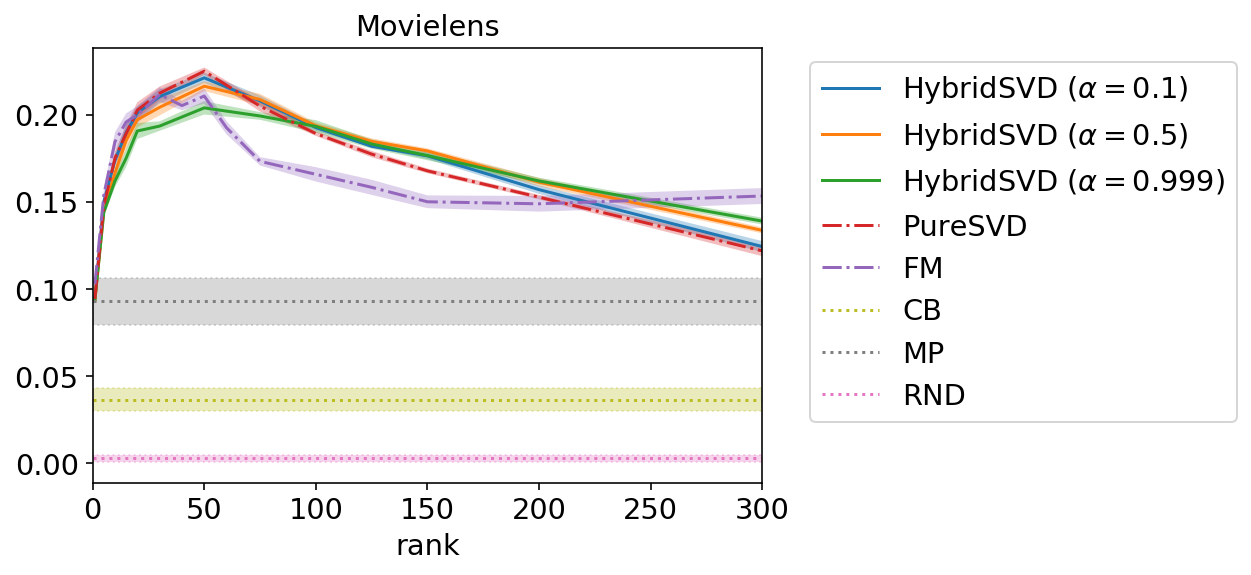

In [15]:
ax_hr_ml = plot_rank_results([std_svd_ml, std_fm_ml], std_base_ml, metric='HR', err_alpha=0.3, xlim=(0, 300), styles=line_styles)
plt.title('Movielens');

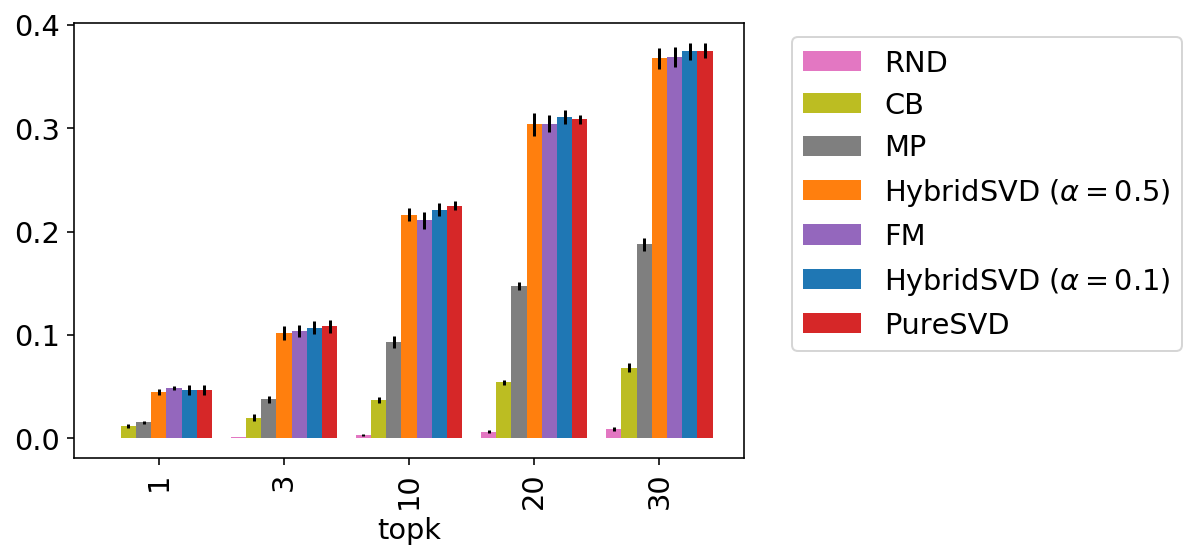

In [16]:
plot_topn_results(std_topn_ml, metric='HR', styles=line_styles, width=0.85)

## Movielens - MRR

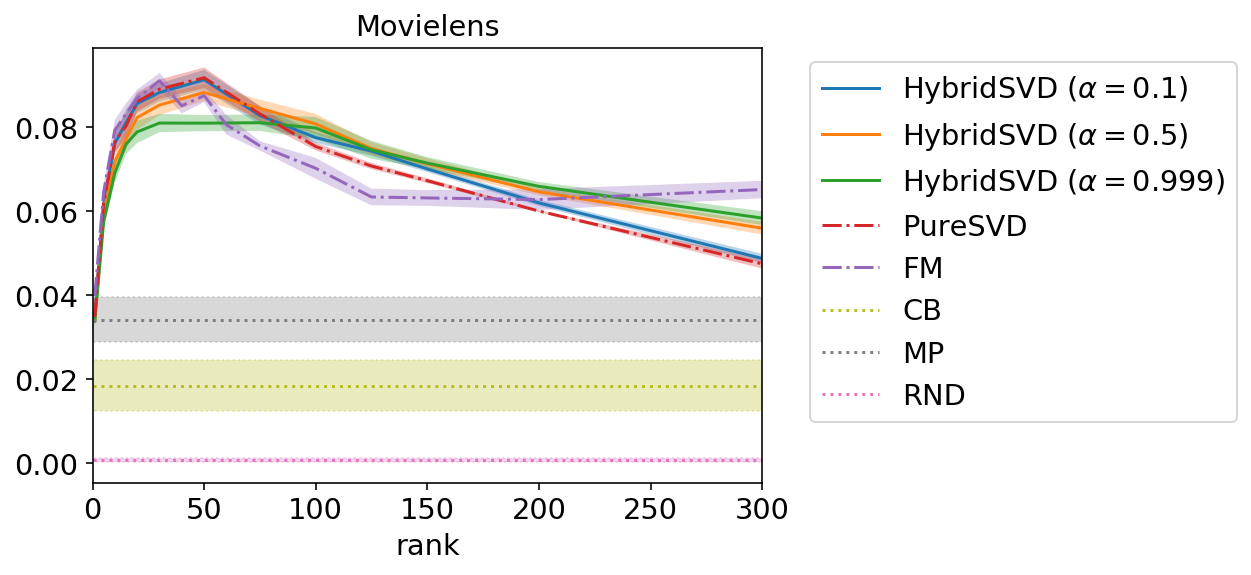

In [17]:
plot_rank_results([std_svd_ml, std_fm_ml], std_base_ml, metric='MRR', err_alpha=0.3, xlim=(0, 300), styles=line_styles)
plt.title('Movielens');

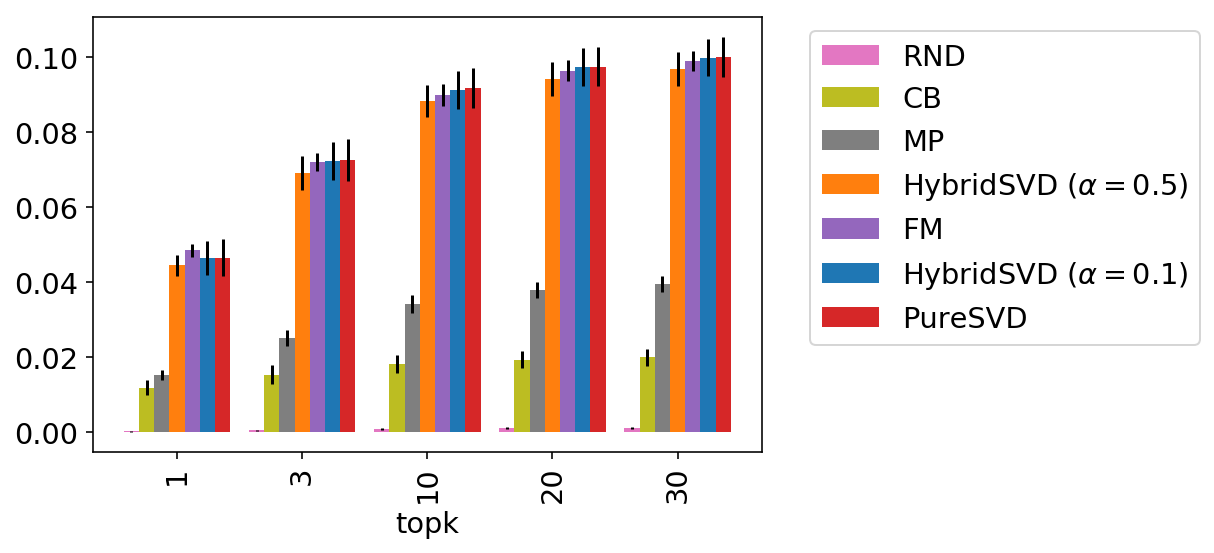

In [18]:
plot_topn_results(std_topn_ml, metric='MRR', styles=line_styles, width=0.85)

## BookCrossing - HR

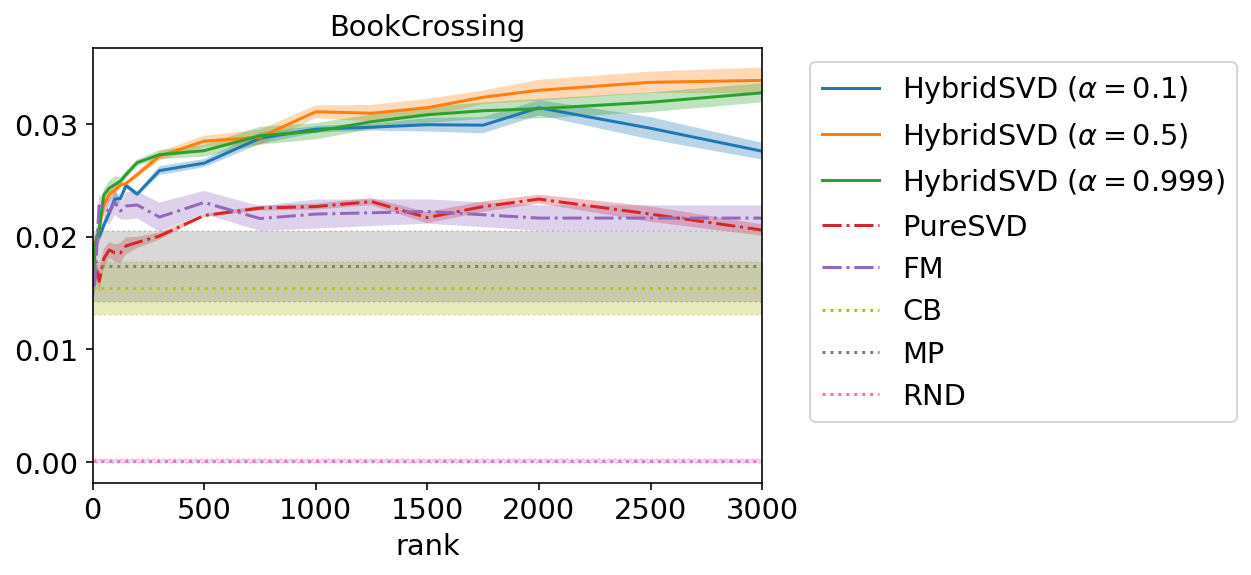

In [19]:
plot_rank_results([std_svd_bx, std_fm_bx], std_base_bx, metric='HR', err_alpha=0.3, xlim=(0, 3000), logx=False, styles=line_styles)
plt.title('BookCrossing');

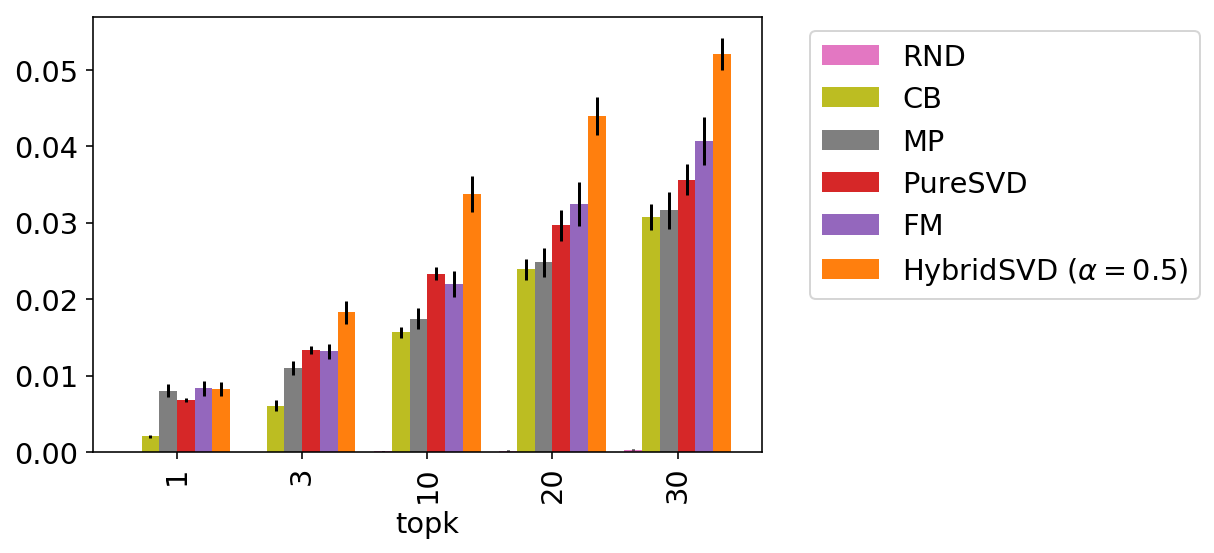

In [20]:
plot_topn_results(std_topn_bx, metric='HR', styles=line_styles, width=0.85)

## BookCrossing - MRR

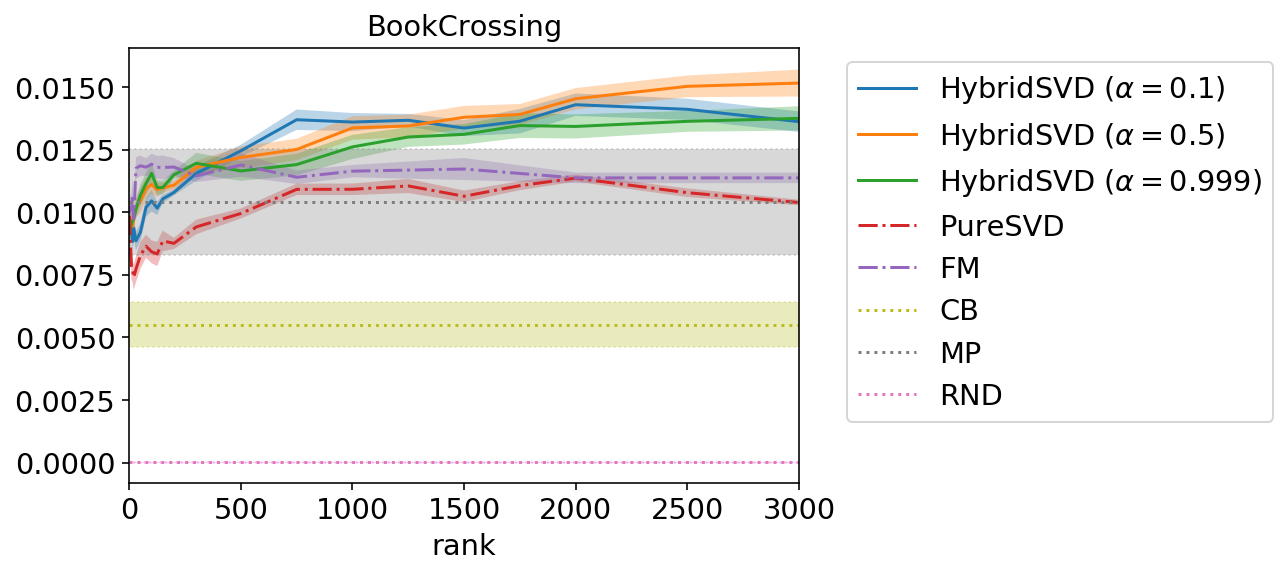

In [21]:
plot_rank_results([std_svd_bx, std_fm_bx], std_base_bx, metric='MRR', err_alpha=0.3, xlim=(0, 3000), styles=line_styles)
plt.title('BookCrossing');

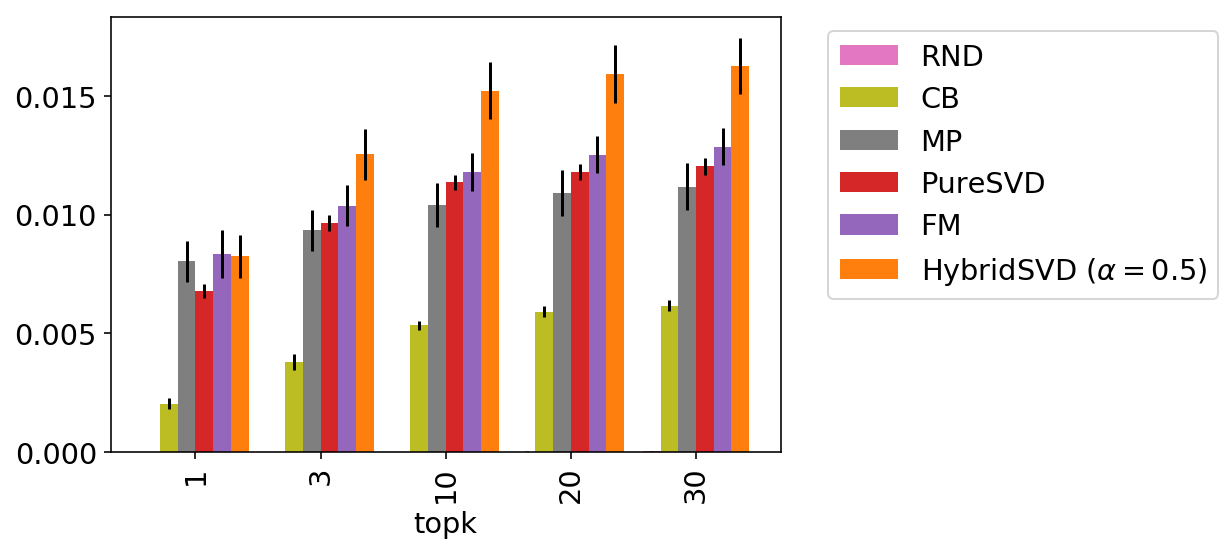

In [22]:
plot_topn_results(std_topn_bx, metric='MRR', styles=line_styles, width=0.85);

# Cold-start settings

## Movielens - HR

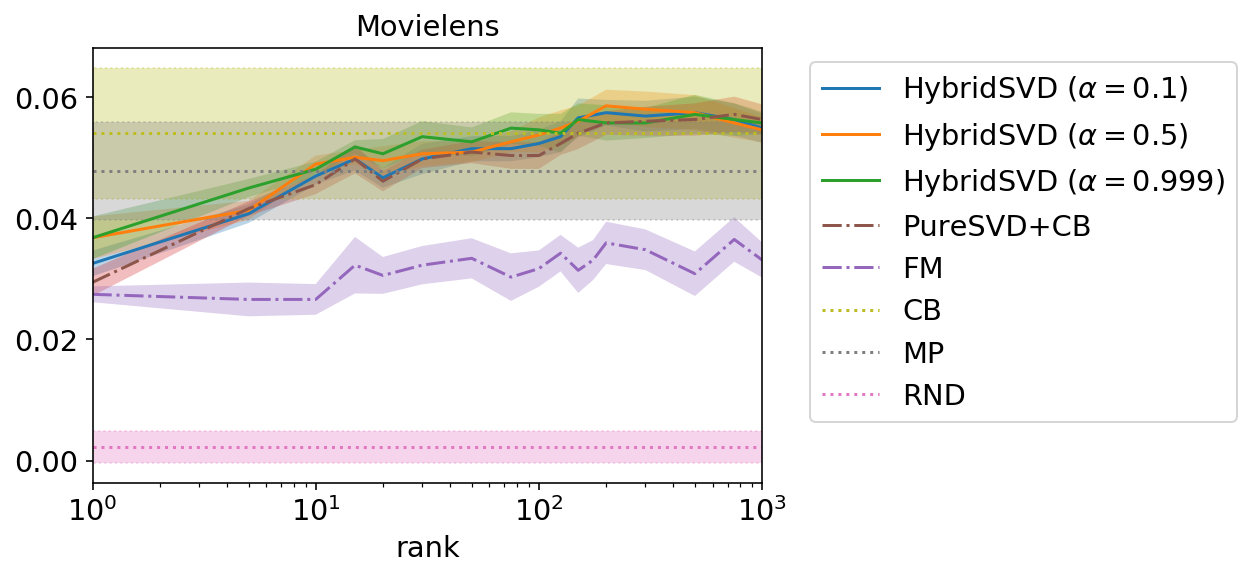

In [23]:
plot_rank_results([cls_svd_ml, cls_fm_ml], cls_base_ml, metric='HR', xlim=(1, 1000), logx=True, err_alpha=0.3, styles=line_styles)
plt.title('Movielens');

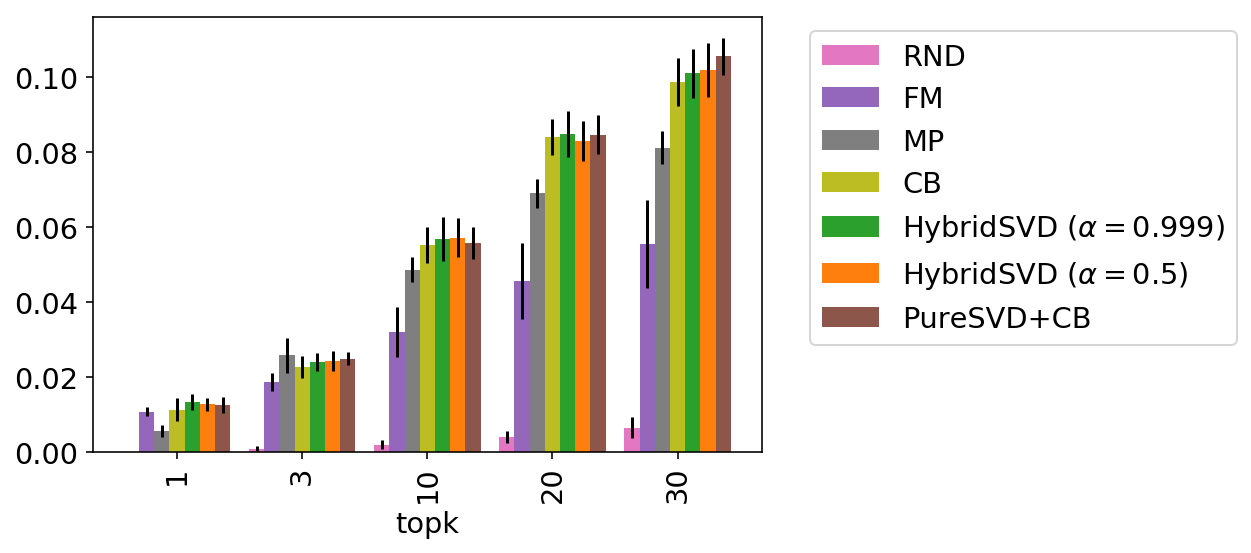

In [24]:
plot_topn_results(cls_topn_ml, metric='HR', styles=line_styles, width=0.85)

## Movielens - MRR

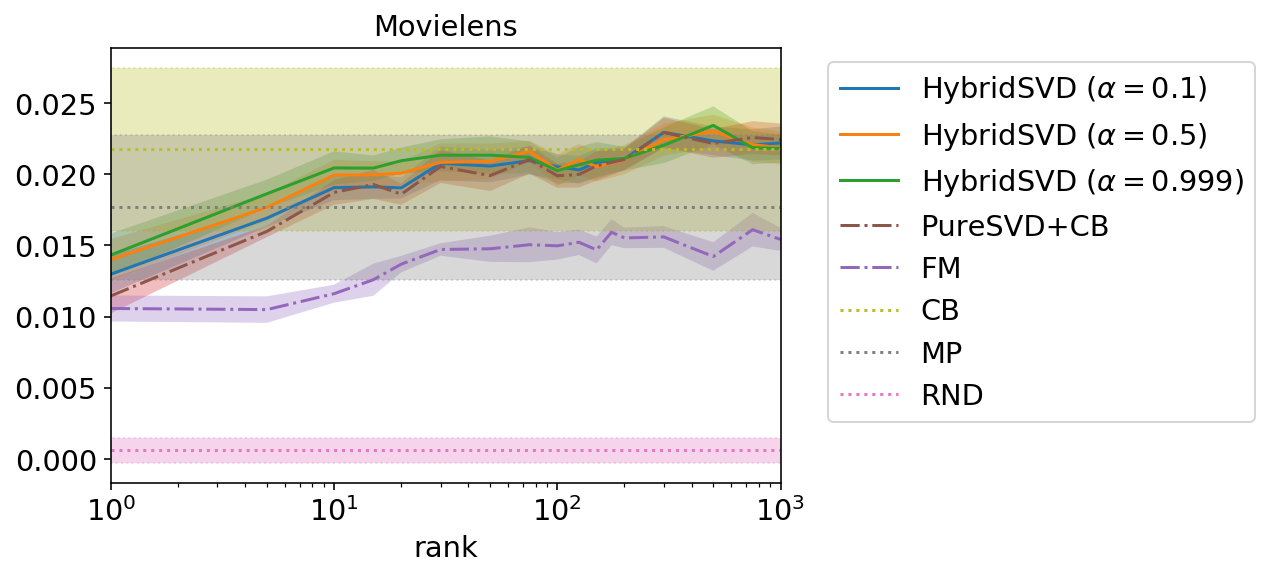

In [25]:
plot_rank_results([cls_svd_ml, cls_fm_ml], cls_base_ml, metric='MRR', xlim=(1, 1000), logx=True, err_alpha=0.3, styles=line_styles)
plt.title('Movielens');

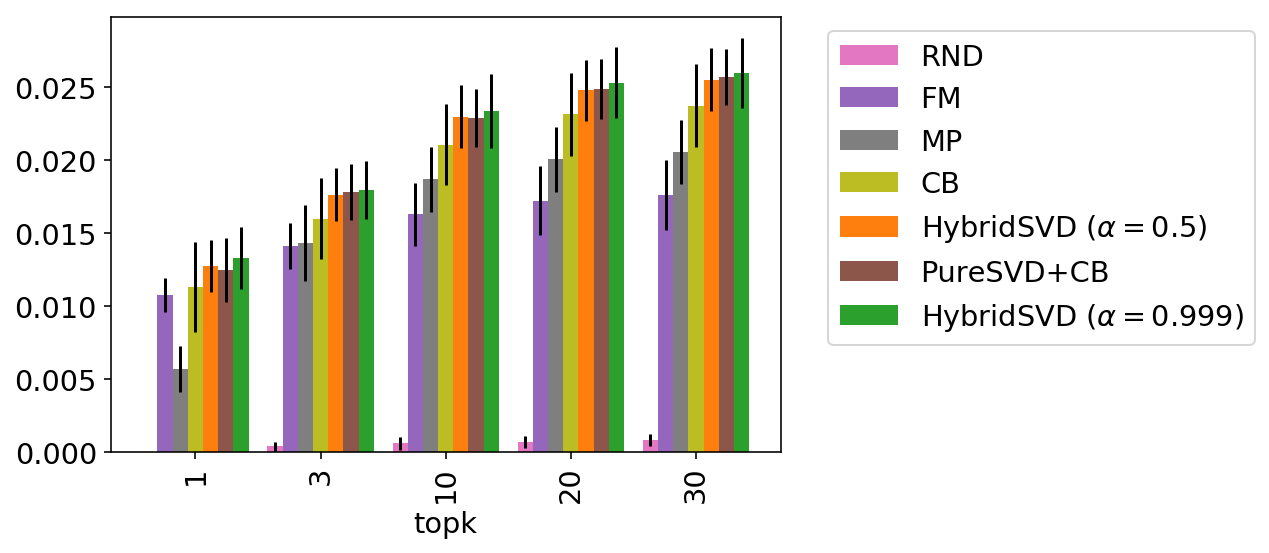

In [26]:
plot_topn_results(cls_topn_ml, metric='MRR', styles=line_styles, width=0.85)

## BookCrossing - HR

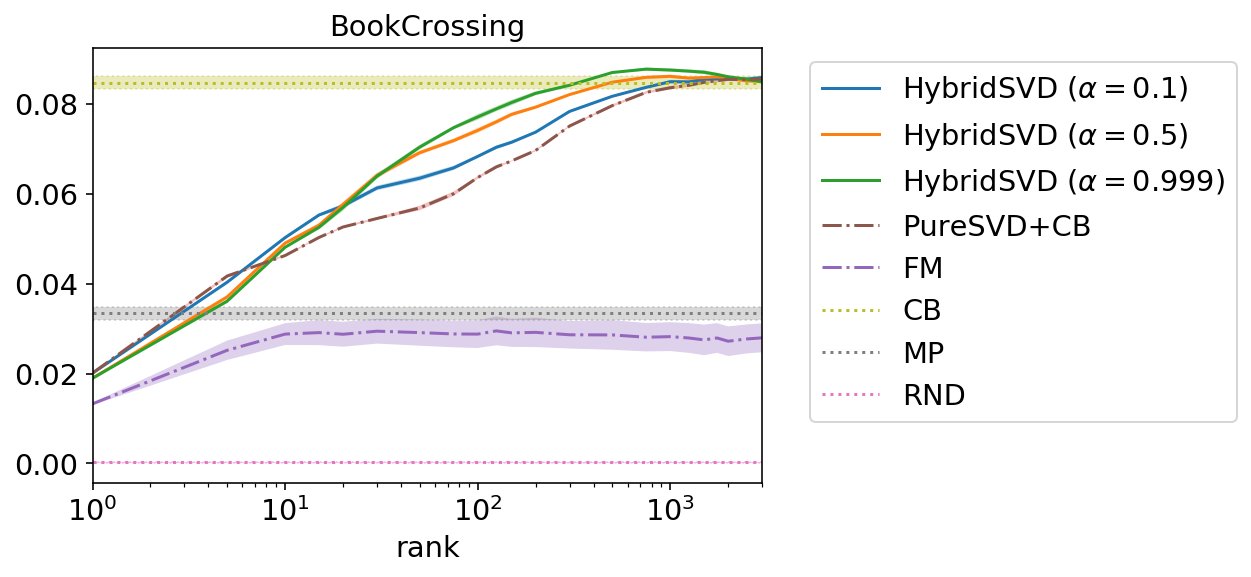

In [27]:
plot_rank_results([cls_svd_bx, cls_fm_bx], cls_base_bx, metric='HR', xlim=(1, 3000), logx=True, err_alpha=0.3, styles=line_styles)
plt.title('BookCrossing');

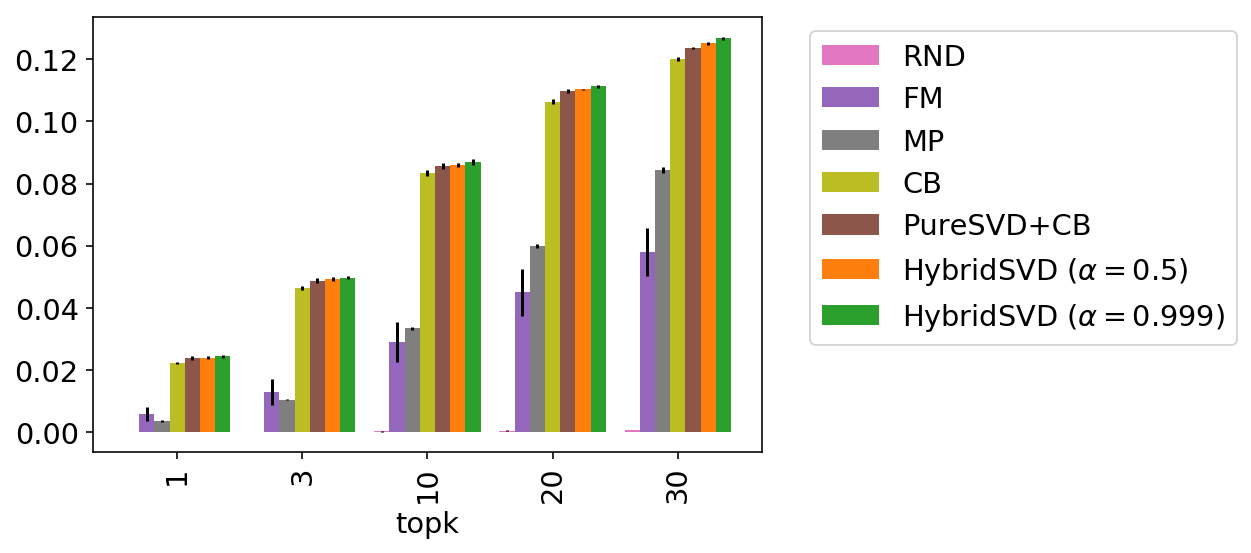

In [28]:
plot_topn_results(cls_topn_bx, metric='HR', styles=line_styles, width=0.85)

## BookCrossing - MRR

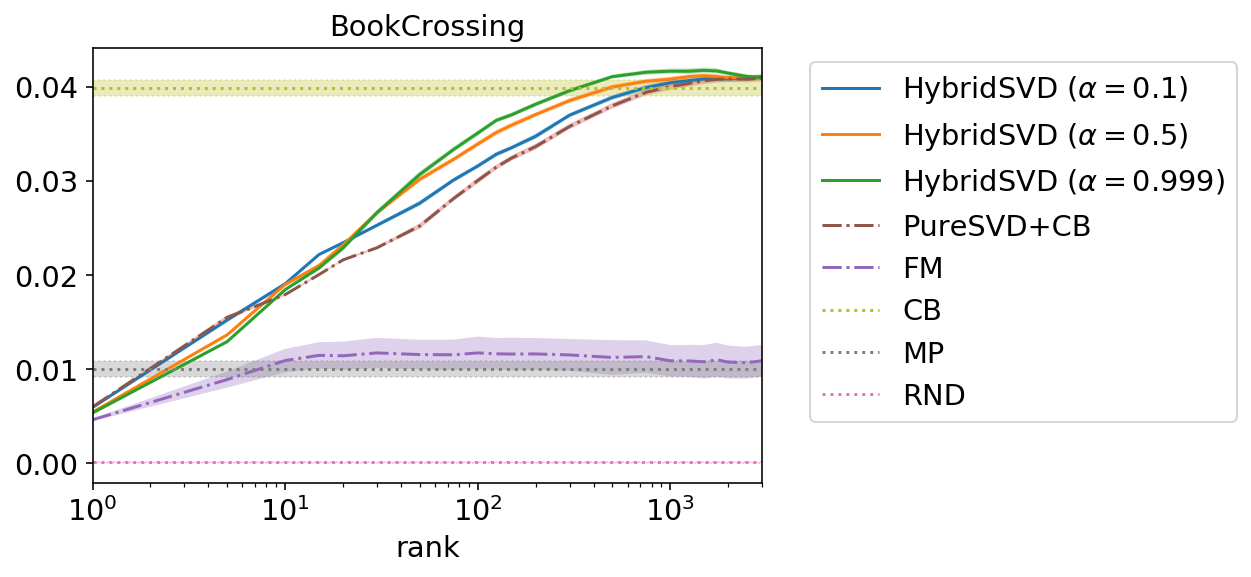

In [29]:
plot_rank_results([cls_svd_bx, cls_fm_bx], cls_base_bx, metric='MRR', xlim=(1, 3000), logx=True, err_alpha=0.3, styles=line_styles)
plt.title('BookCrossing');

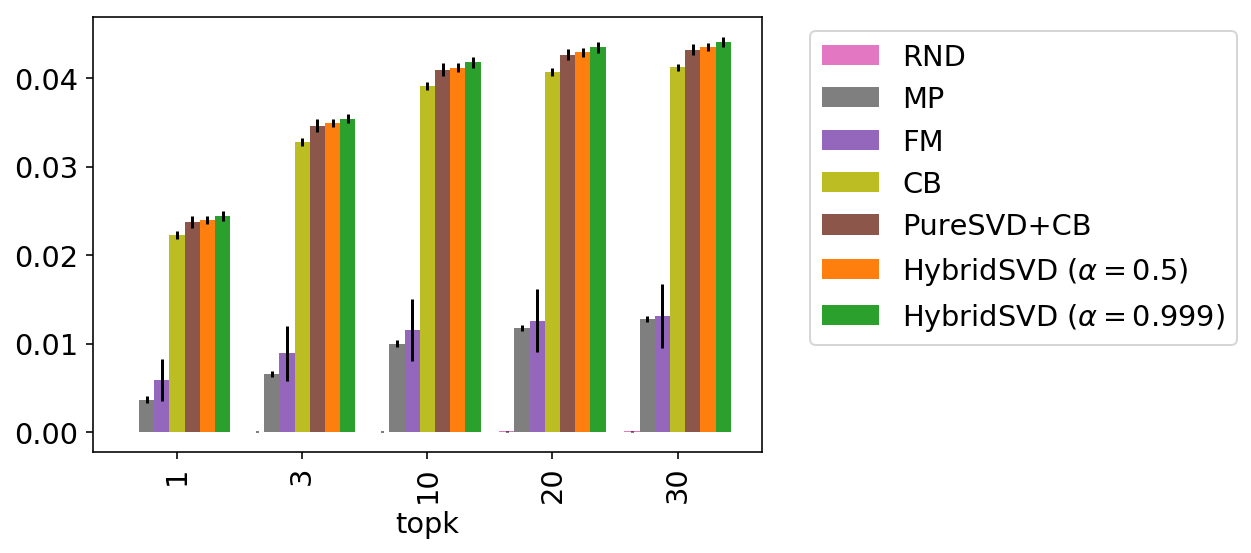

In [30]:
plot_topn_results(cls_topn_bx, metric='MRR', styles=line_styles, width=0.85)

# Combined

## standard

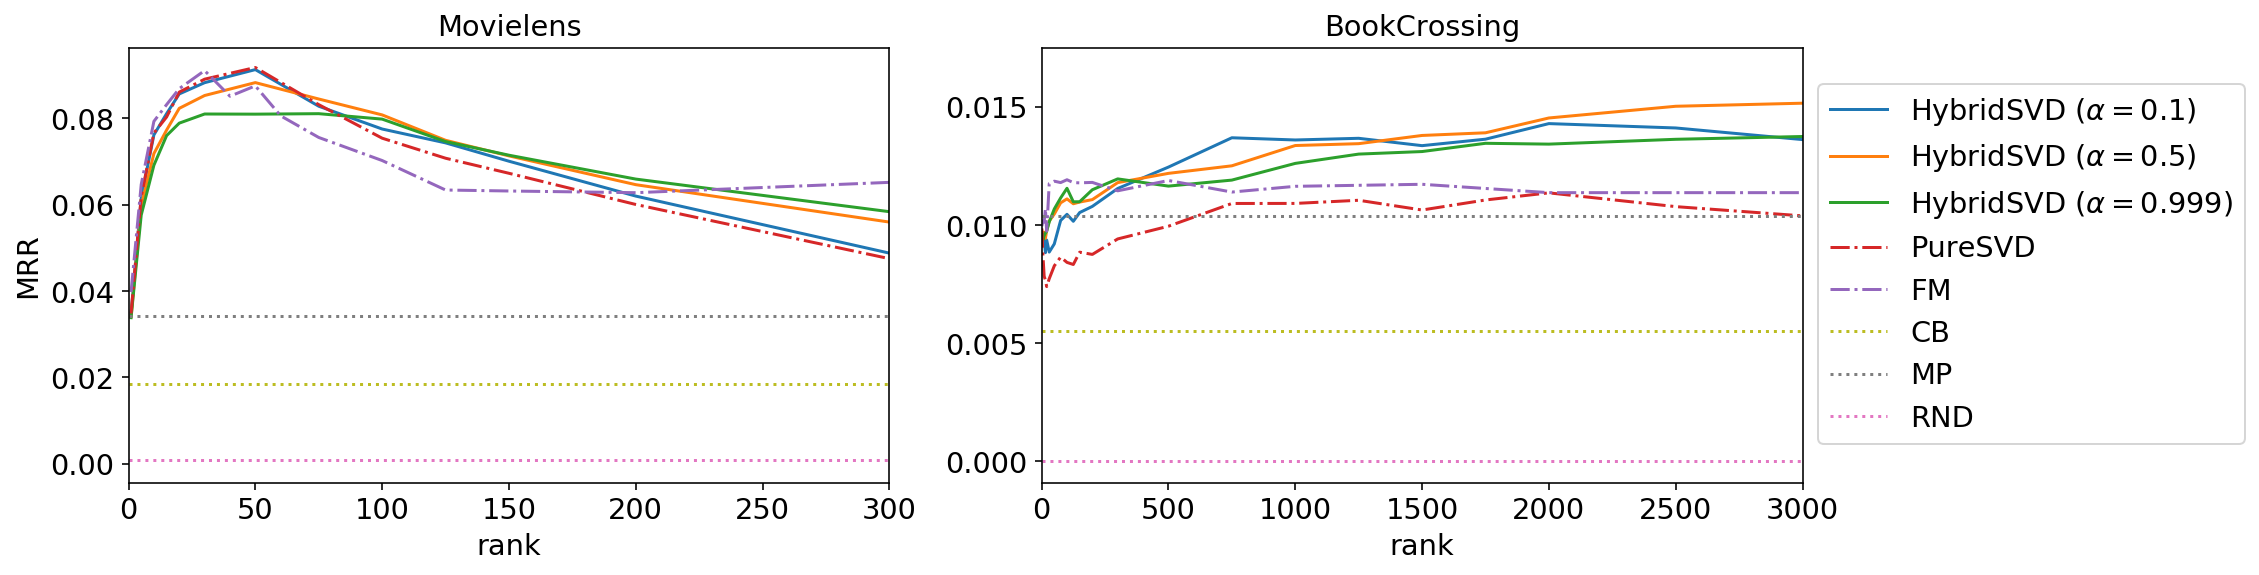

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))

ax_std_mrr_ml = plot_rank_results([std_svd_ml, std_fm_ml], std_base_ml, ax=ax[0], metric='MRR', xlim=(0, 300), styles=line_styles)
ax_std_mrr_bx = plot_rank_results([std_svd_bx, std_fm_bx], std_base_bx, ax=ax[1], metric='MRR', xlim=(0, 3000), ylim=(-0.0009, 0.0175), styles=line_styles)

ax_std_mrr_ml.set_title('Movielens')
ax_std_mrr_bx.set_title('BookCrossing')
ax_std_mrr_ml.set_ylabel('MRR')


ax_std_mrr_bx.legend(loc=1, bbox_to_anchor=(1.6, 0.95))

# plt.tight_layout()
# plt.savefig("std_rank_mrr.pdf", bbox_inches='tight')

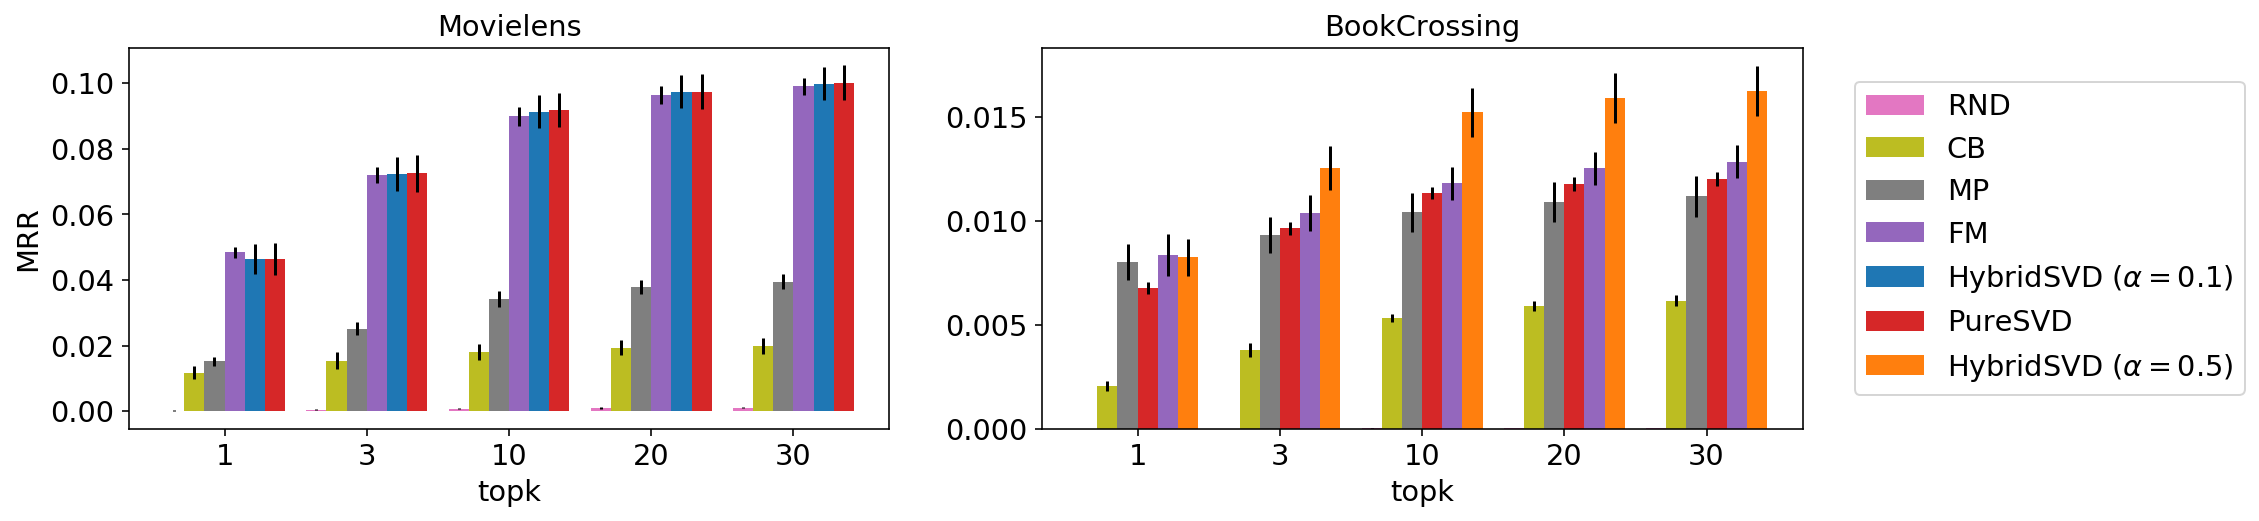

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(15, 3.5))

ax_std_topn_mrr_ml = plot_topn_results(std_topn_ml.drop(r'HybridSVD ($\alpha=0.5$)', axis=1, level=0), metric='MRR', ax=ax[0], styles=line_styles, width=0.85, rot=0)
ax_std_topn_mrr_bx = plot_topn_results(std_topn_bx, metric='MRR', ax=ax[1], styles=line_styles, width=0.85, rot=0)

ax_std_topn_mrr_ml.set_title('Movielens')
ax_std_topn_mrr_ml.set_ylabel('MRR')
ax_std_topn_mrr_bx.set_title('BookCrossing')

axh1, axl1 = ax_std_topn_mrr_ml.get_legend_handles_labels()
axh2, axl2 = ax_std_topn_mrr_bx.get_legend_handles_labels()
axl = r'HybridSVD ($\alpha=0.5$)'
axh = axh2[axl2.index(axl)]

plt.legend(handles=axh1+[axh], labels=axl1+[axl], loc=1, bbox_to_anchor=(1.6, 0.95))
# plt.savefig("std_topn_mrr.pdf", bbox_inches='tight')

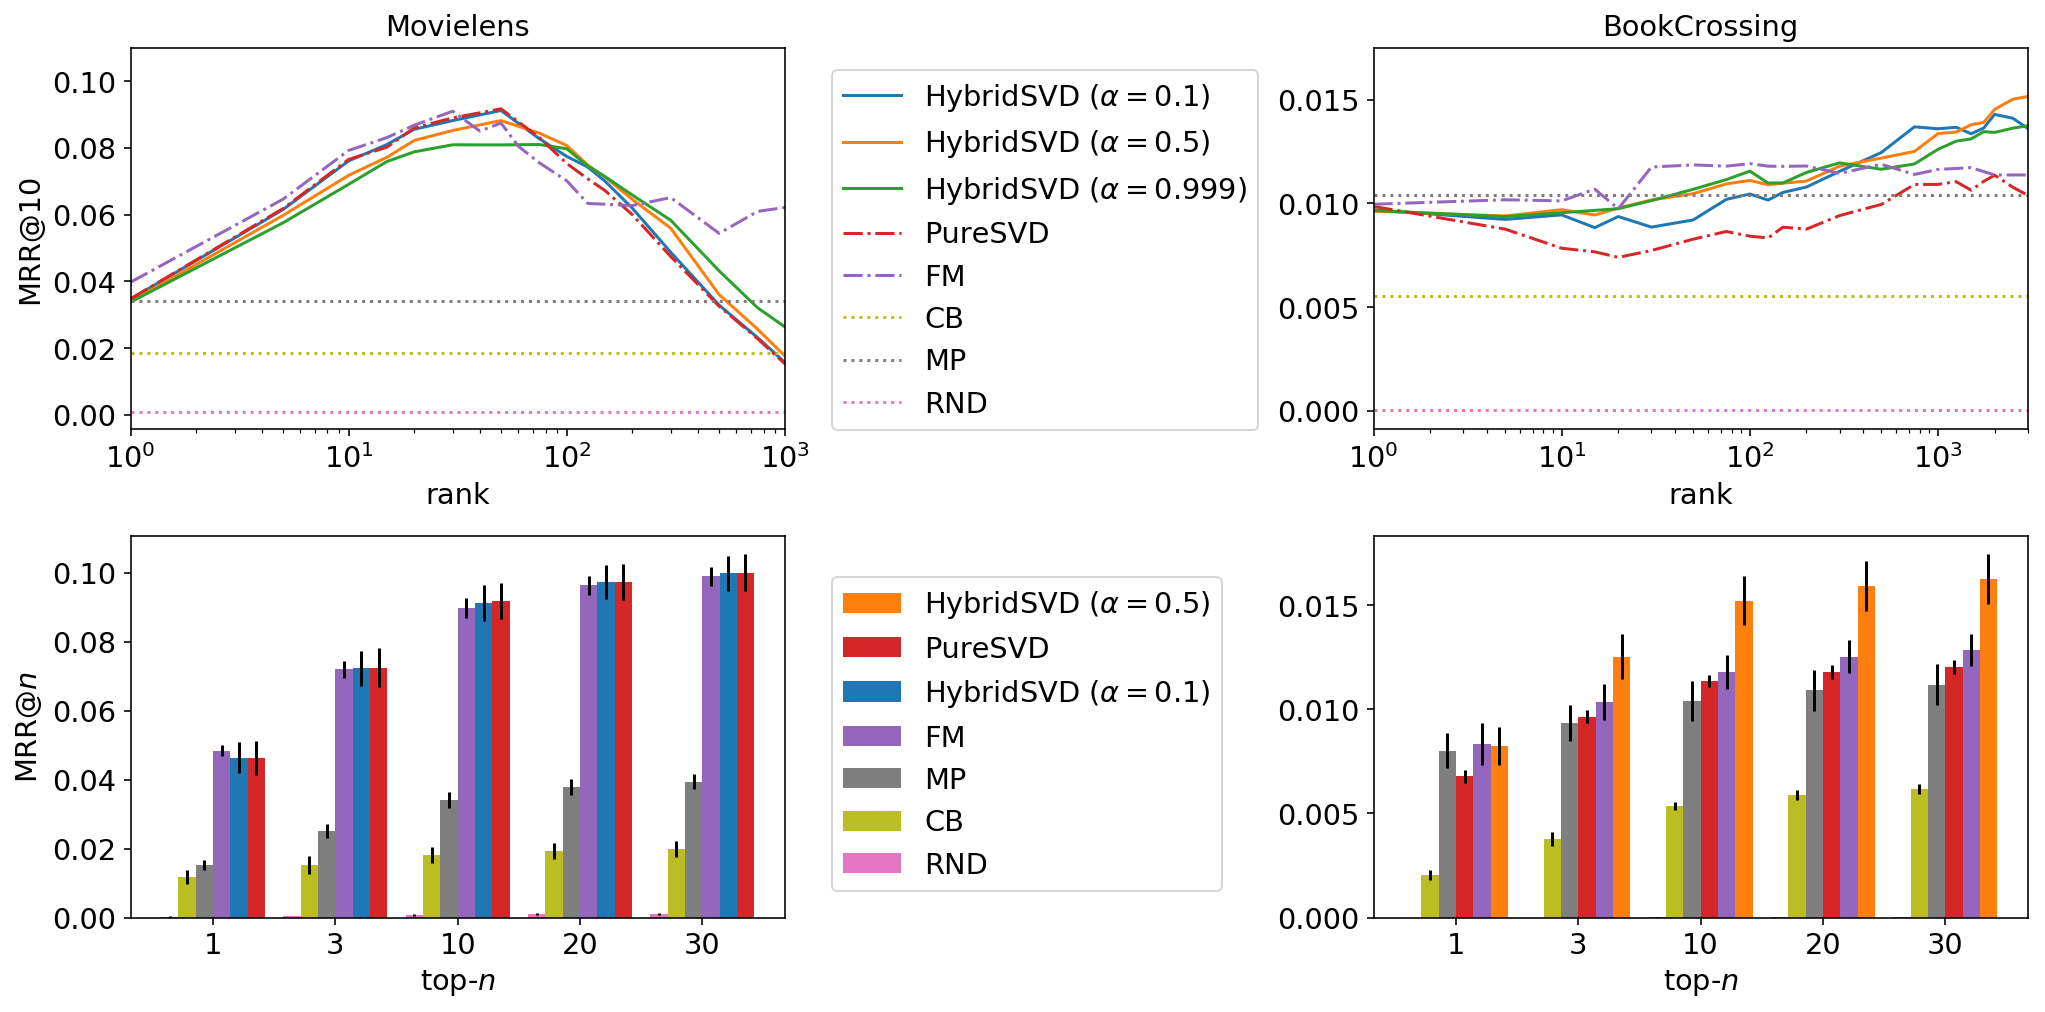

In [33]:
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(17, 8))

ax_std_mrr_ml = plot_rank_results([std_svd_ml, std_fm_ml], std_base_ml, ax=ax1[0], metric='MRR', xlim=(1, 1000), logx=True, ylim=(None, 0.11), styles=line_styles)
ax_std_mrr_bx = plot_rank_results([std_svd_bx, std_fm_bx], std_base_bx, ax=ax1[1], metric='MRR', xlim=(1, 3000), logx=True, ylim=(-0.0009, 0.0175), styles=line_styles)

ax_std_mrr_ml.set_title('Movielens')
ax_std_mrr_bx.set_title('BookCrossing')
ax_std_mrr_ml.set_ylabel('MRR@10')


ax_std_mrr_bx.legend(loc=2, bbox_to_anchor=(-0.85, 0.98))


ax_std_topn_mrr_ml = plot_topn_results(std_topn_ml.drop(r'HybridSVD ($\alpha=0.5$)', axis=1, level=0), metric='MRR', ax=ax2[0], styles=line_styles, width=0.85, rot=0, ylim=(0, None))
ax_std_topn_mrr_bx = plot_topn_results(std_topn_bx, metric='MRR', ax=ax2[1], styles=line_styles, width=0.85, rot=0)

ax_std_topn_mrr_ml.set_ylabel('MRR@$n$')
ax_std_topn_mrr_ml.set_xlabel('top-$n$')
ax_std_topn_mrr_bx.set_xlabel('top-$n$')

axh1, axl1 = ax_std_topn_mrr_ml.get_legend_handles_labels()
axh2, axl2 = ax_std_topn_mrr_bx.get_legend_handles_labels()
axl = r'HybridSVD ($\alpha=0.5$)'
axh = axh2[axl2.index(axl)]

plt.legend(handles=reversed(axh1+[axh]), labels=reversed(axl1+[axl]), loc=2, bbox_to_anchor=(-0.85, 0.93))
fig.subplots_adjust(wspace=0.9, hspace=0.28)

# plt.savefig("std_mrr.pdf", bbox_inches='tight')

## cold-start

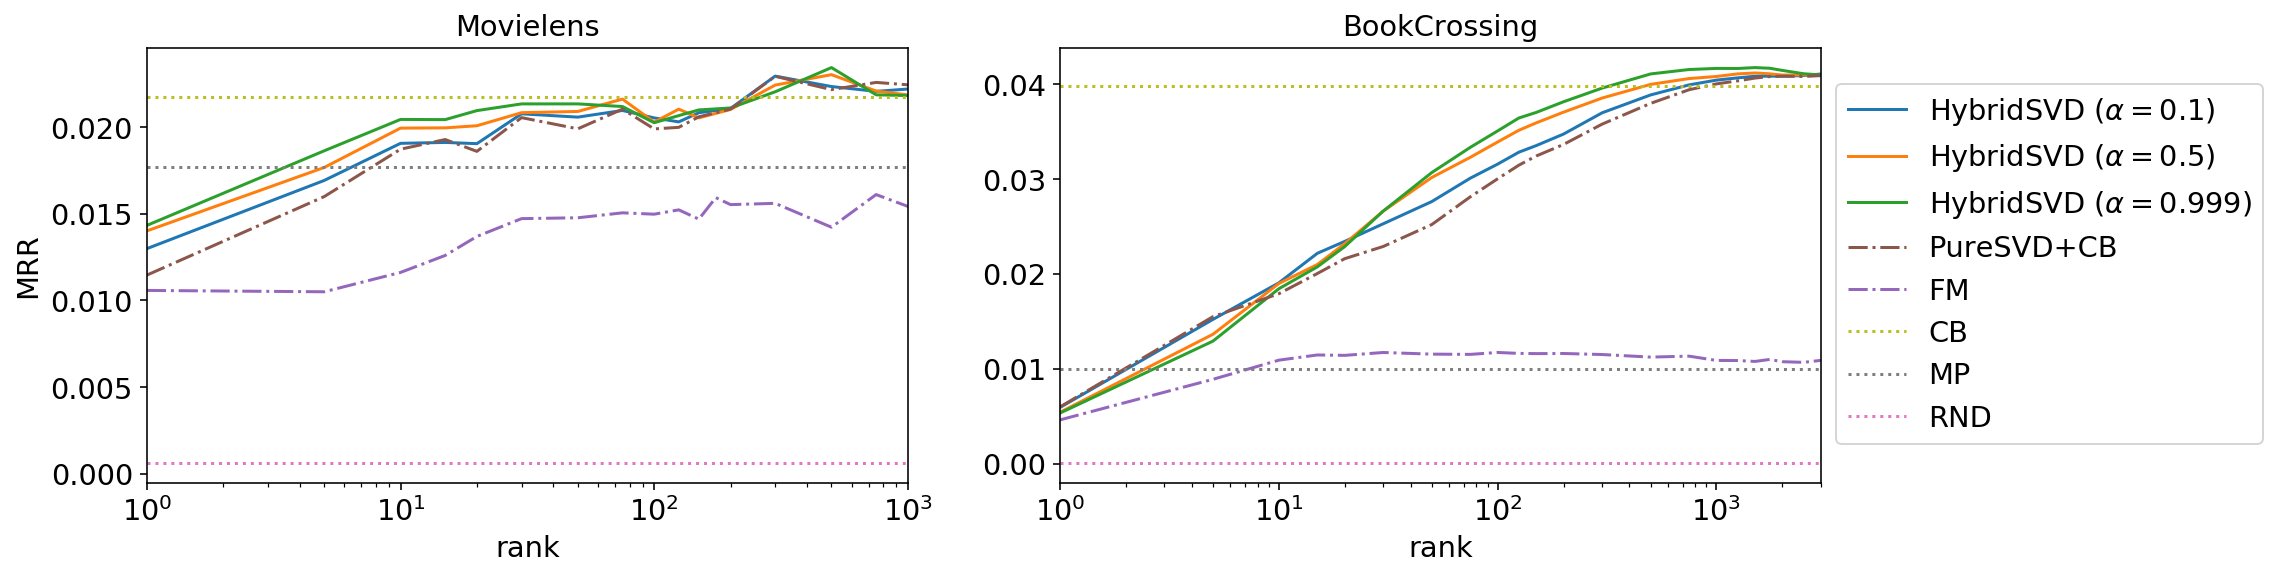

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))

ax_cls_mrr_ml = plot_rank_results([cls_svd_ml, cls_fm_ml], cls_base_ml, metric='MRR', ax=ax[0], xlim=(1, 1000), logx=True, styles=line_styles)
ax_cls_mrr_bx = plot_rank_results([cls_svd_bx, cls_fm_bx], cls_base_bx, metric='MRR', ax=ax[1], xlim=(1, 3000), logx=True, styles=line_styles)

ax_cls_mrr_ml.set_title('Movielens')
ax_cls_mrr_bx.set_title('BookCrossing')
ax_cls_mrr_ml.set_ylabel('MRR')


ax_cls_mrr_bx.legend(loc=1, bbox_to_anchor=(1.6, 0.95))
# plt.tight_layout()
# plt.savefig("cls_rank_mrr.pdf", bbox_inches='tight')

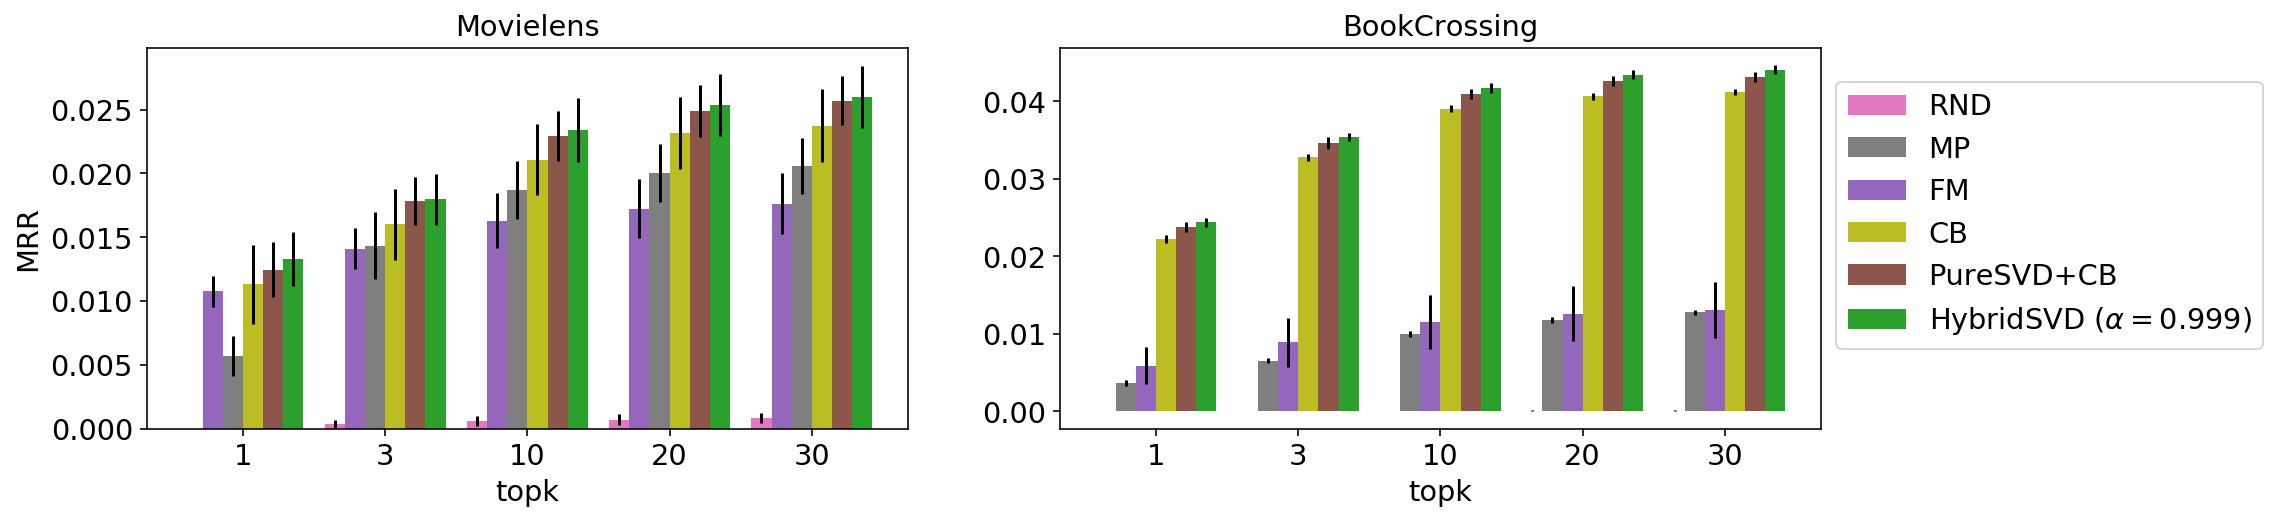

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(15, 3.5))

ax_cls_topn_mrr_ml = plot_topn_results(cls_topn_ml.drop(r'HybridSVD ($\alpha=0.5$)', axis=1, level=0), metric='MRR', ax=ax[0], styles=line_styles, width=0.85, rot=0)
ax_cls_topn_mrr_bx = plot_topn_results(cls_topn_bx.drop(r'HybridSVD ($\alpha=0.5$)', axis=1, level=0), metric='MRR', ax=ax[1], styles=line_styles, width=0.85, rot=0)

ax_cls_topn_mrr_ml.set_title('Movielens')
ax_cls_topn_mrr_ml.set_ylabel('MRR')
ax_cls_topn_mrr_bx.set_title('BookCrossing')

ax_cls_topn_mrr_bx.legend(bbox_to_anchor=(1.6, 0.95))
# plt.savefig("cls_topn_mrr.pdf", bbox_inches='tight')

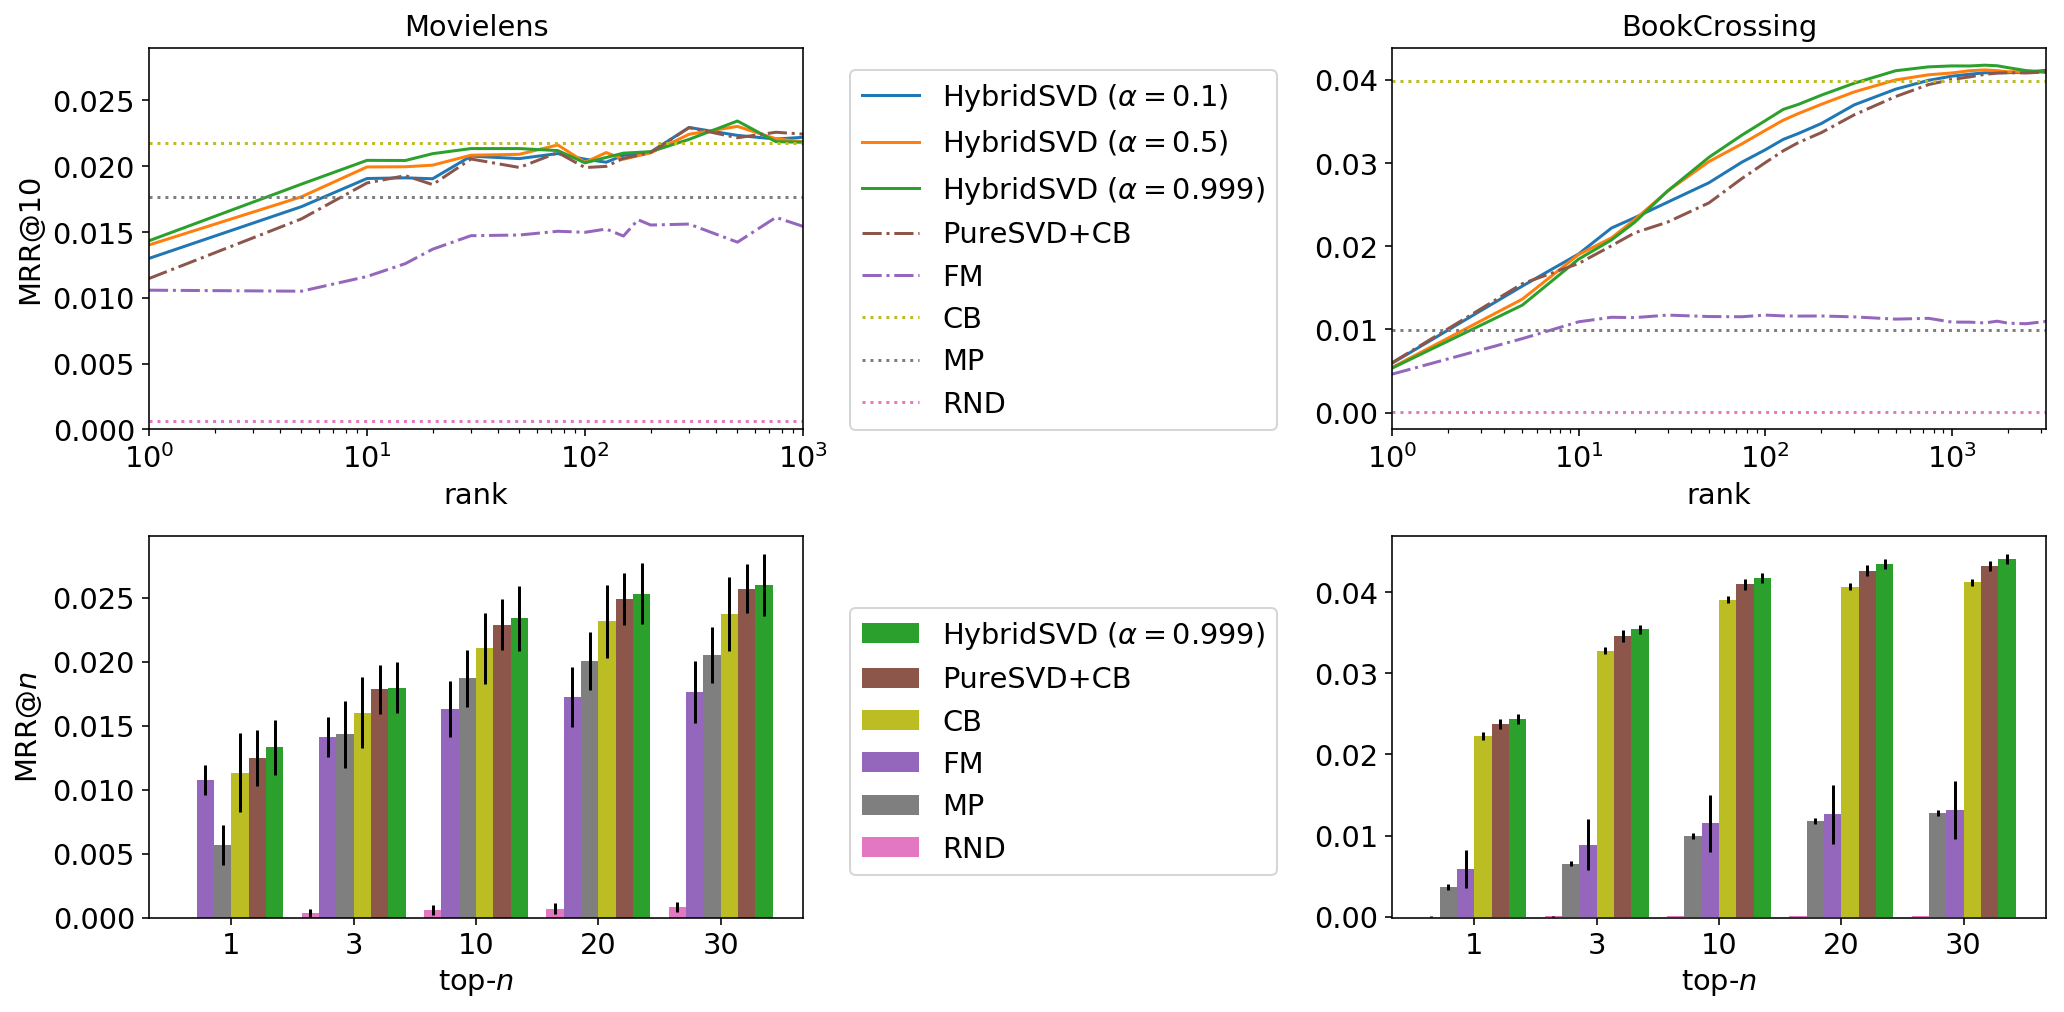

In [36]:
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(17, 8))


ax_cls_mrr_ml = plot_rank_results([cls_svd_ml, cls_fm_ml], cls_base_ml, metric='MRR', ax=ax1[0], xlim=(1, 1000), ylim=(0, 0.029), logx=True, styles=line_styles)
ax_cls_mrr_bx = plot_rank_results([cls_svd_bx, cls_fm_bx], cls_base_bx, metric='MRR', ax=ax1[1], xlim=(1, 3200), logx=True, styles=line_styles)

ax_cls_mrr_ml.set_title('Movielens')
ax_cls_mrr_bx.set_title('BookCrossing')
ax_cls_mrr_ml.set_ylabel('MRR@10')

ax_cls_mrr_bx.legend(loc=2, bbox_to_anchor=(-0.85, 0.98))

ax_cls_topn_mrr_ml = plot_topn_results(cls_topn_ml.drop(r'HybridSVD ($\alpha=0.5$)', axis=1, level=0), metric='MRR', ax=ax2[0], styles=line_styles, width=0.85, rot=0)
ax_cls_topn_mrr_bx = plot_topn_results(cls_topn_bx.drop(r'HybridSVD ($\alpha=0.5$)', axis=1, level=0), metric='MRR', ax=ax2[1], styles=line_styles, width=0.85, rot=0, ylim=(-0.0001, None))

ax_cls_topn_mrr_ml.set_ylabel('MRR@$n$')
ax_cls_topn_mrr_ml.set_xlabel('top-$n$')
ax_cls_topn_mrr_bx.set_xlabel('top-$n$')

handles, labels = ax_cls_topn_mrr_bx.get_legend_handles_labels()
ax_cls_topn_mrr_bx.legend(reversed(handles), reversed(labels), loc=2, bbox_to_anchor=(-0.85, 0.85))

fig.subplots_adjust(wspace=0.9, hspace=0.28)

# plt.savefig("cls_mrr.pdf", bbox_inches='tight')